In [139]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('spiral.csv')

In [141]:
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [142]:
# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

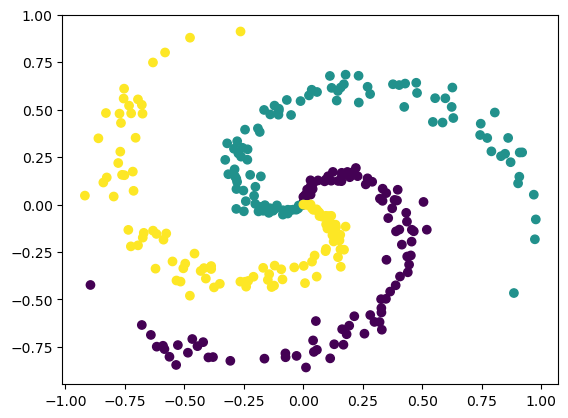

In [143]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.show()

In [144]:
X.shape

(300, 2)

In [145]:
m,n,d=300,3,2
w = 0.01*np.random.randn(d,n)
b = np.zeros(shape=(1,n))

In [146]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [147]:
z = np.dot(X,W)+b
print(z.shape)

(300, 3)


In [148]:
exp_z = np.exp(z)
probs = exp_z/np.sum(exp_z,axis=1,keepdims=True)
print(probs)

[[0.33333333 0.33333333 0.33333333]
 [0.33330091 0.33331606 0.33338303]
 [0.33330116 0.33328543 0.33341341]
 [0.33325999 0.3332679  0.33347211]
 [0.33320917 0.33325994 0.3335309 ]
 [0.33319655 0.33323058 0.33357287]
 [0.33324078 0.33318904 0.33357019]
 [0.33318553 0.33317306 0.33364141]
 [0.33312602 0.33316355 0.33371043]
 [0.333169   0.33312118 0.33370982]
 [0.33310675 0.33310892 0.33378433]
 [0.33308811 0.3330852  0.33382668]
 [0.3330793  0.33305871 0.333862  ]
 [0.33300829 0.33305243 0.33393928]
 [0.33308109 0.3330026  0.33391631]
 [0.33315848 0.33296693 0.33387459]
 [0.33314072 0.33294291 0.33391637]
 [0.33321035 0.33291638 0.33387327]
 [0.33310904 0.33289465 0.3339963 ]
 [0.33327938 0.33287176 0.33384886]
 [0.33331436 0.33285143 0.33383421]
 [0.33308403 0.33282064 0.33409533]
 [0.33323092 0.33279592 0.33397316]
 [0.33318158 0.33276955 0.33404887]
 [0.33332878 0.33275739 0.33391383]
 [0.33322173 0.33272295 0.33405532]
 [0.33327075 0.33270281 0.33402644]
 [0.33338609 0.33269409 0.33

In [149]:
def loss(y, probs):
    m = y.shape[0]    #dz = probs
    error = -np.log(probs[range(m), y])
    return np.sum(error)/m
loss(y, probs)

1.098391868724584

In [150]:
def backprop(y,probs):
    m = y.shape[0]
    dz = probs
    dz[range(m),y]-=1  # 300,3
    dz = dz/m 
    dw = np.dot(X.T,dz)
    db = np.sum(dz,axis=0,keepdims=True)
    return (dw,db)

In [151]:
def forward_pass(X,w,b):
    z = np.dot(X,w)+b
    exp_z = np.exp(z)
    probs = exp_z/np.sum(exp_z,axis=1,keepdims=True)
    return probs

In [154]:
max_iter = 1000
los = []
lr = 0.1
for iter in range(max_iter):
    probs = forward_pass(X,w,b)
    losses = loss(y,probs)
    los.append(losses)
    if(iter%100==0):
        print("loss" , losses)
    dw,db = backprop(y,probs)
    w+= -lr*dw
    b+= -lr*db    

loss 0.763405865556885
loss 0.756408807488748
loss 0.7518026824819511
loss 0.748662318929912
loss 0.7464625574379589
loss 0.744888448406365
loss 0.7437426219153204
loss 0.7428968864943212
loss 0.7422654861663154
loss 0.7417896214156051


In [164]:
z = np.dot(X,w)+b
exp_z = np.exp(z)
prbs = exp_z/np.sum(exp_z,axis=1,keepdims=True)
pred = (np.argmax(prbs,axis=1))
print("acc : ",np.sum(pred==y)/m)

acc :  0.5233333333333333


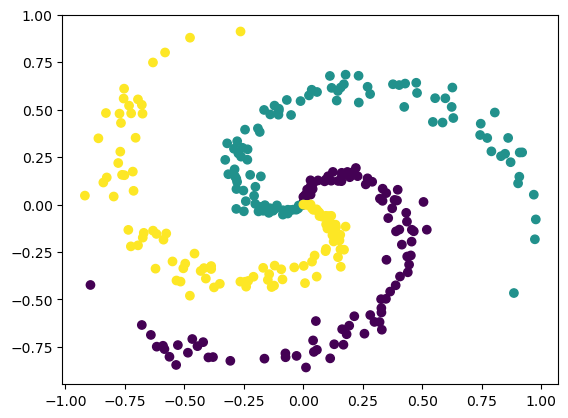

In [165]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.show()

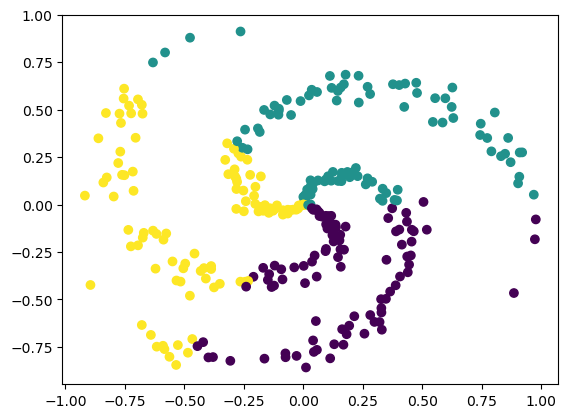

In [166]:
plt.scatter(df['x1'],df['x2'],c=pred)
plt.show()